Primer Examen 15% A) Cargando el archivo JSON:

https://github.com/restrepo/anomaly/raw/main/solutions.json.gz en Pandas

1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'

2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 

3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  𝑥  y en el eje  𝑦  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones

𝑥e𝑥=𝑝,
 
sin𝑥𝑥=+𝑝,
 
sin𝑥𝑥=−𝑝,
 
cos𝑥𝑥=+𝑝,
 
cos𝑥𝑥=−𝑝,
 
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de  𝑝  IV) Encuentre la solución a la ecuación trascendental para el intervalo  𝑥  entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo. A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

A.

In [188]:
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df.head()

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11


1. Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'

In [121]:
max = df.solution.max()

In [ ]:
df.solution.map((i,index))=> {
    i.map((j,indexj)=>{
      if (j>max):
        max=i 
        Fila = index
    })    
  })

In [204]:
df['smax'] = df.apply(lambda t: max(t['solution']), axis = 'columns')
df

2. Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 

In [ ]:
df['sum_s'] = max

3. 3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje 𝑥 y en el eje 𝑦 del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

In [13]:
import random

In [37]:
np.random.seed(100041) #No voy a colocar toda mi cedula. 1000411452, son más números.
random.randint(0,390073)

362615

In [42]:
df1 = pd.DataFrame(df.iloc[362615])
df1

,362615
l,"[2, -4, 6]"
k,"[-1, 0, -3, 2]"
solution,"[3, 9, 9, -10, -14, -20, 26, 27, -30]"
gcd,13
n,9
smax,<built-in function max>


In [51]:
P = np.poly1d([3,9,9,-10,-14,-20,26,27,-30]) #Crepo el polinomio con los coeficientes de solution.
print(P)

   8     7     6      5      4      3      2
3 x + 9 x + 9 x - 10 x - 14 x - 20 x + 26 x + 27 x - 30


In [47]:
from sympy import Symbol
from scipy import diff
from scipy import optimize

In [54]:
x = Symbol('x')
y = (3*x**8) + (9*x**7) - (9*x**6) + (-10*x**5) - (-14*x**4) + (-20*x**3) - (26*x**2) + (27*x) -30
derivada = y.diff(x)
print(derivada)

24*x**7 + 63*x**6 - 54*x**5 - 50*x**4 + 56*x**3 - 60*x**2 - 52*x + 27


In [97]:
fprime = np.poly1d([24,63,-54,-50,56,-60,-52,27]) #Derivada
fprime

poly1d([ 24,  63, -54, -50,  56, -60, -52,  27])

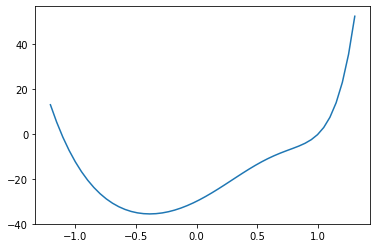

In [108]:
#Gráfica para las raices
x = np.linspace(-1.2,1.3)
y = P(x)

plt.plot(x,y)

In [101]:
#Raíces:
r1 = optimize.newton(P,0)
r2 = optimize.newton(P,-1)
print(r1,r2)


1.0 -1.1093951756394194


In [104]:
P(1)

0

In [105]:
P(-1.1093951756394194)

-1.4210854715202004e-14

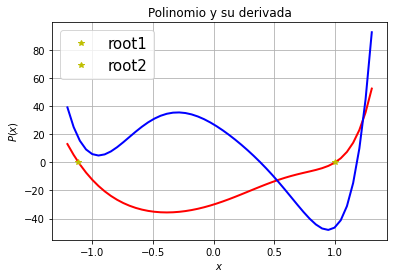

In [118]:
#Gráfica
x = np.linspace(-1.2,1.3)
y = P(x)
yp = fprime(x)

plt.plot(x,y,linewidth=2, linestyle='-', color='red') #Polinomio
plt.plot(x,yp,linewidth=2, linestyle='-', color='blue') #Derivada

plt.grid()
plt.plot(1,0,'y*',alpha=1,label='root1') 
plt.plot(-1.1093951756394194,0,'y*',alpha=1,label='root2')

plt.xlabel('$ x $',size=10)
plt.ylabel('$ P(x) $',size=10)
plt.legend(loc='best',fontsize=15)
plt.title(r'Polinomio y su derivada')

plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones

𝑥e𝑥=𝑝,
 
sin𝑥𝑥=+𝑝,
 
sin𝑥𝑥=−𝑝,
 
cos𝑥𝑥=+𝑝,
 
cos𝑥𝑥=−𝑝,

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de  𝑝  IV) Encuentre la solución a la ecuación trascendental para el intervalo  𝑥  entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo. A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

1.

In [133]:
np.random.seed(100041) #No voy a colocar toda mi cedula. 1000411452, son más números.
random.randint(1,5)

3

2. De acuerdo a eso, la funcion a usar es sinxx = -p

In [140]:
#Elegir la función
op = rd.choice(['f1', 'f2','f3', 'f4','f5'])
op

'f3'

3.

In [135]:
import random as rd

In [141]:
p = rd.uniform(0,1)
p

0.3746078989929087

In [207]:
def f3(x):
    p = 0.3746078989929087
    
    return np.sin(x) + p

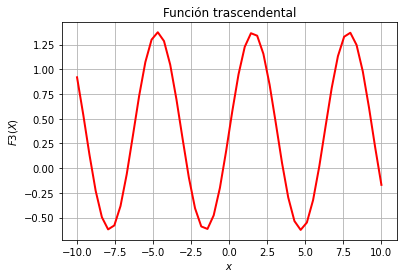

In [224]:
X = np.linspace(-10,10)
Y = f3(X)


#Gráfica

plt.plot(X,Y,linewidth=2, linestyle='-', color='red') 


plt.grid()



plt.xlabel('$ x $',size=10)
plt.ylabel('$ F3(X) $',size=10)

plt.title(r'Función trascendental')

plt.show()

Raices:

In [218]:
R1 = optimize.newton(f3,-10)
print(R1)

-9.040804117220079


In [219]:
R2 = optimize.newton(f3,-7.5)
print(R2)

-6.66715915072889


In [220]:
R3 = optimize.newton(f3,-5)
print(R3)

-12.950344457908473


In [221]:

R4 = optimize.newton(f3,0)
print(R4)

-0.38397384354930314


In [222]:

R6 = optimize.newton(f3,10)
print(R6)

9.808751804318684
